In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

sns.set_style('whitegrid')

In [13]:
data = pd.read_csv('../data/raw.csv',index_col=0)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4374 entries, 2005/1/4 to 2022/12/27
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   close           4374 non-null   float64
 1   open            4374 non-null   float64
 2   high            4374 non-null   float64
 3   low             4374 non-null   float64
 4   volume/K        4374 non-null   float64
 5   daliy_region    4373 non-null   float64
 6   daily_opengian  4373 non-null   float64
 7   daily_gain      4373 non-null   float64
 8   ln_Rt           4373 non-null   float64
dtypes: float64(9)
memory usage: 341.7+ KB


<AxesSubplot: >

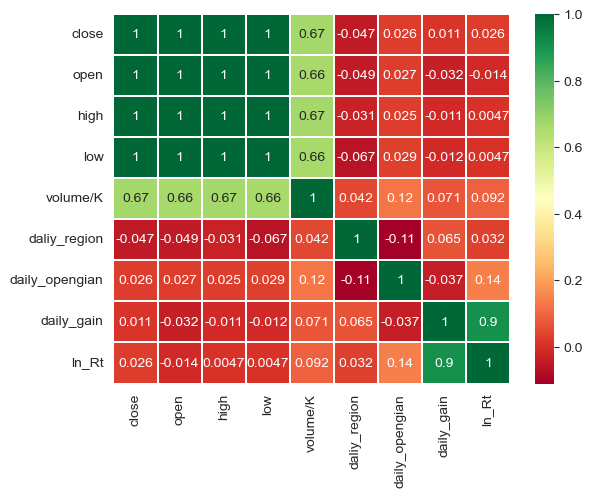

In [15]:
sns.heatmap(data.corr('spearman'), annot=True, cmap='RdYlGn', linewidths=0.2)

## technical analysis indicators

In [16]:
import talib

In [17]:
data['MACD'] = talib.MACD(data['close'])[0]
data['MACD_l'] = talib.MACD(data['low'])[0]
data['MAMA'] = talib.MAMA(data['close'])[0]
data['MAMA_l'] = talib.MAMA(data['low'])[0]
data['SAR'] = talib.SAR(data['high'], data['low'], acceleration=0, maximum=0)
data['ADX'] = talib.ADX(data['high'], data['low'], data['close'], timeperiod=14)
data['TRIX'] = talib.TRIX(data['close'])
data['AROONOSC'] = talib.AROONOSC(data['high'], data['low'], timeperiod=14)
data['CCI'] = talib.CCI(data['high'], data['low'], data['close'], timeperiod=14)
data['DX'] = talib.DX(data['high'], data['low'], data['close'], timeperiod=14)
data['MINUS_DI'] = talib.MINUS_DI(data['high'], data['low'], data['close'], timeperiod=14)
data['MINUS_DM'] = talib.MINUS_DM(data['high'], data['low'], timeperiod=14)
data['PLUS_DI'] = talib.PLUS_DI(data['high'], data['low'], data['close'], timeperiod=14)
data['PLUS_DM'] = talib.PLUS_DM(data['high'], data['low'], timeperiod=14)
data['BBANDS'] = talib.BBANDS(data['close'], timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)[0]
data['BBANDS_l'] = talib.BBANDS(data['low'], timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)[0]
data['MIDPOINT'] = talib.MIDPOINT(data['close'], timeperiod=14)
data['MIDPRICE'] = talib.MIDPRICE(data['high'], data['low'], timeperiod=14)
data['HT_DCPERIOD'] = talib.HT_DCPERIOD(data['close'])
data['HT_DCPHASE'] = talib.HT_DCPHASE(data['close'])
data['HT_PHASOR'] = talib.HT_PHASOR(data['close'])[0]
#data['VHF'] = talib.VHF(data['high'], data['low'], timeperiod=14)[0]
#data['RVI'] = talib.RVI(data['close'], data['high'], data['low'], timeperiod=14)[0]
data['K'], data['D'] = talib.STOCH(data['high'], data['low'], data['close'], fastk_period=20, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
data['J'] = 3 * data['K'] - 2 * data['D']
#data['BIAS'] = talib.BIAS(data['close'], timeperiod=14)[0]
#data['Force'] = talib.FORCE(data['close'], data['volume/K'], timeperiod=14)[0]
#data['VR'] = talib.VR(data['close'], data['volume/K'], timeperiod=14)[0]
#data['DPO'] = talib.DPO(data['close'], timeperiod=14)[0]
#data['NVI'] = talib.NVI(data['close'], data['volume/K'])[0]
#data['PVI'] = talib.PVI(data['close'], data['volume/K'])[0]
data['ROC'] = talib.ROC(data['close'], timeperiod=22)
data['OBV'] = talib.OBV(data['close'], data['volume/K'])
#data['PSY'] = talib.PSY(data['close'], timeperiod=14)[0]
#data['MTM'] = talib.MTM(data['close'], timeperiod=14)[0]
data['CMO'] = talib.CMO(data['close'], timeperiod=18)
data['RSI'] = talib.RSI(data['close'], timeperiod=20)

alpha#6，alpha#12，alpha#23，alpha#28，alpha#54，alpha#101（主要参考了《WorldQuant Formulaic 101 Alphas》研究报告中给出的阿尔法因子计算公式，具体见附录）

In [18]:
data['alpha_12'] = np.sign(1000*(data['volume/K'] - data['volume/K'].shift(1))*(-(data['close'] - data['close'].shift(1))))
data['alpha_101'] = (data['close']-data['open'])/(data['high']-data['low']+0.001)
data['alpha_54'] = (-1 * ((data['low'] - data['close']) * (data['open']**5))) / ((data['low']- data['high']) * (data['close']**5))
data['flag'] =  data['high'].rolling(20).sum()/20 <data['high'] 
data['alpha_23'] = -1*(data['high']-data['high'].shift(2))*data['flag']
#data['alpha_6'] = -1*smt.stattools.acf(data['open'].rolling(10),data['volume/K'].rolling(10)*1000)[0]


In [19]:
data.fillna(method='ffill', inplace=True)
data.drop(['flag'], axis=1, inplace=True)

In [20]:
data.describe()

,close,open,high,low,volume/K,daliy_region,daily_opengian,daily_gain,ln_Rt,MACD,...,D,J,ROC,OBV,CMO,RSI,alpha_12,alpha_101,alpha_54,alpha_23
count,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,4373.000000,4373.000000,4373.000000,4373.000000,4341.000000,...,4351.000000,4351.000000,4352.000000,4374.000000,4356.000000,4354.000000,4373.000000,4374.000000,4374.000000,4372.000000
mean,3192.676925,3189.853361,3220.210103,3159.266358,98.703370,0.019117,0.000310,0.001028,0.000314,4.623936,...,56.118983,56.107724,1.071247,24286.289723,4.299506,52.101602,-0.109078,0.059675,-0.530663,-14.330588
std,1121.243717,1121.615746,1130.646632,1109.714451,79.821149,0.012693,0.017967,0.015157,0.016640,72.021899,...,30.178999,36.228926,8.687334,15665.886812,24.402641,11.684067,0.993456,0.578905,0.311658,45.803490
min,818.030000,816.550000,823.860000,807.780000,-21.320000,0.003489,-0.118782,-0.100686,-0.096952,-296.249238,...,1.234885,-40.272841,-29.968359,-110.090000,-57.149252,23.238440,-1.000000,-0.999995,-0.999465,-479.930000
25%,2443.605000,2439.950000,2461.520000,2417.325000,48.487500,0.010869,-0.007780,-0.006145,-0.007167,-30.344593,...,27.624523,24.051077,-3.967472,12705.157500,-13.606757,43.486470,-1.000000,-0.436136,-0.824273,-21.900000
50%,3257.190000,3254.130000,3280.380000,3223.805000,81.535000,0.015486,0.000426,0.000961,0.000748,3.855248,...,59.754344,60.675250,0.752380,17853.935000,2.702110,51.177186,-1.000000,0.078842,-0.565711,0.000000
75%,3900.242500,3899.727500,3928.332500,3865.785000,123.315000,0.023152,0.009269,0.008430,0.008494,35.774079,...,85.499835,88.903457,5.298366,40118.137500,20.126248,59.611434,1.000000,0.583920,-0.244689,0.000000
max,5877.200000,5922.070000,5930.910000,5815.610000,686.440000,0.113002,0.134921,0.082487,0.089309,263.686851,...,99.642185,142.416385,33.793701,48621.520000,82.959676,90.413093,1.000000,0.999993,0.000000,302.540000


close                AxesSubplot(0.125,0.786098;0.110714x0.0939024)
open              AxesSubplot(0.257857,0.786098;0.110714x0.0939024)
high              AxesSubplot(0.390714,0.786098;0.110714x0.0939024)
low               AxesSubplot(0.523571,0.786098;0.110714x0.0939024)
volume/K          AxesSubplot(0.656429,0.786098;0.110714x0.0939024)
daliy_region      AxesSubplot(0.789286,0.786098;0.110714x0.0939024)
daily_opengian       AxesSubplot(0.125,0.673415;0.110714x0.0939024)
daily_gain        AxesSubplot(0.257857,0.673415;0.110714x0.0939024)
ln_Rt             AxesSubplot(0.390714,0.673415;0.110714x0.0939024)
MACD              AxesSubplot(0.523571,0.673415;0.110714x0.0939024)
MACD_l            AxesSubplot(0.656429,0.673415;0.110714x0.0939024)
MAMA              AxesSubplot(0.789286,0.673415;0.110714x0.0939024)
MAMA_l               AxesSubplot(0.125,0.560732;0.110714x0.0939024)
SAR               AxesSubplot(0.257857,0.560732;0.110714x0.0939024)
ADX               AxesSubplot(0.390714,0.560732;

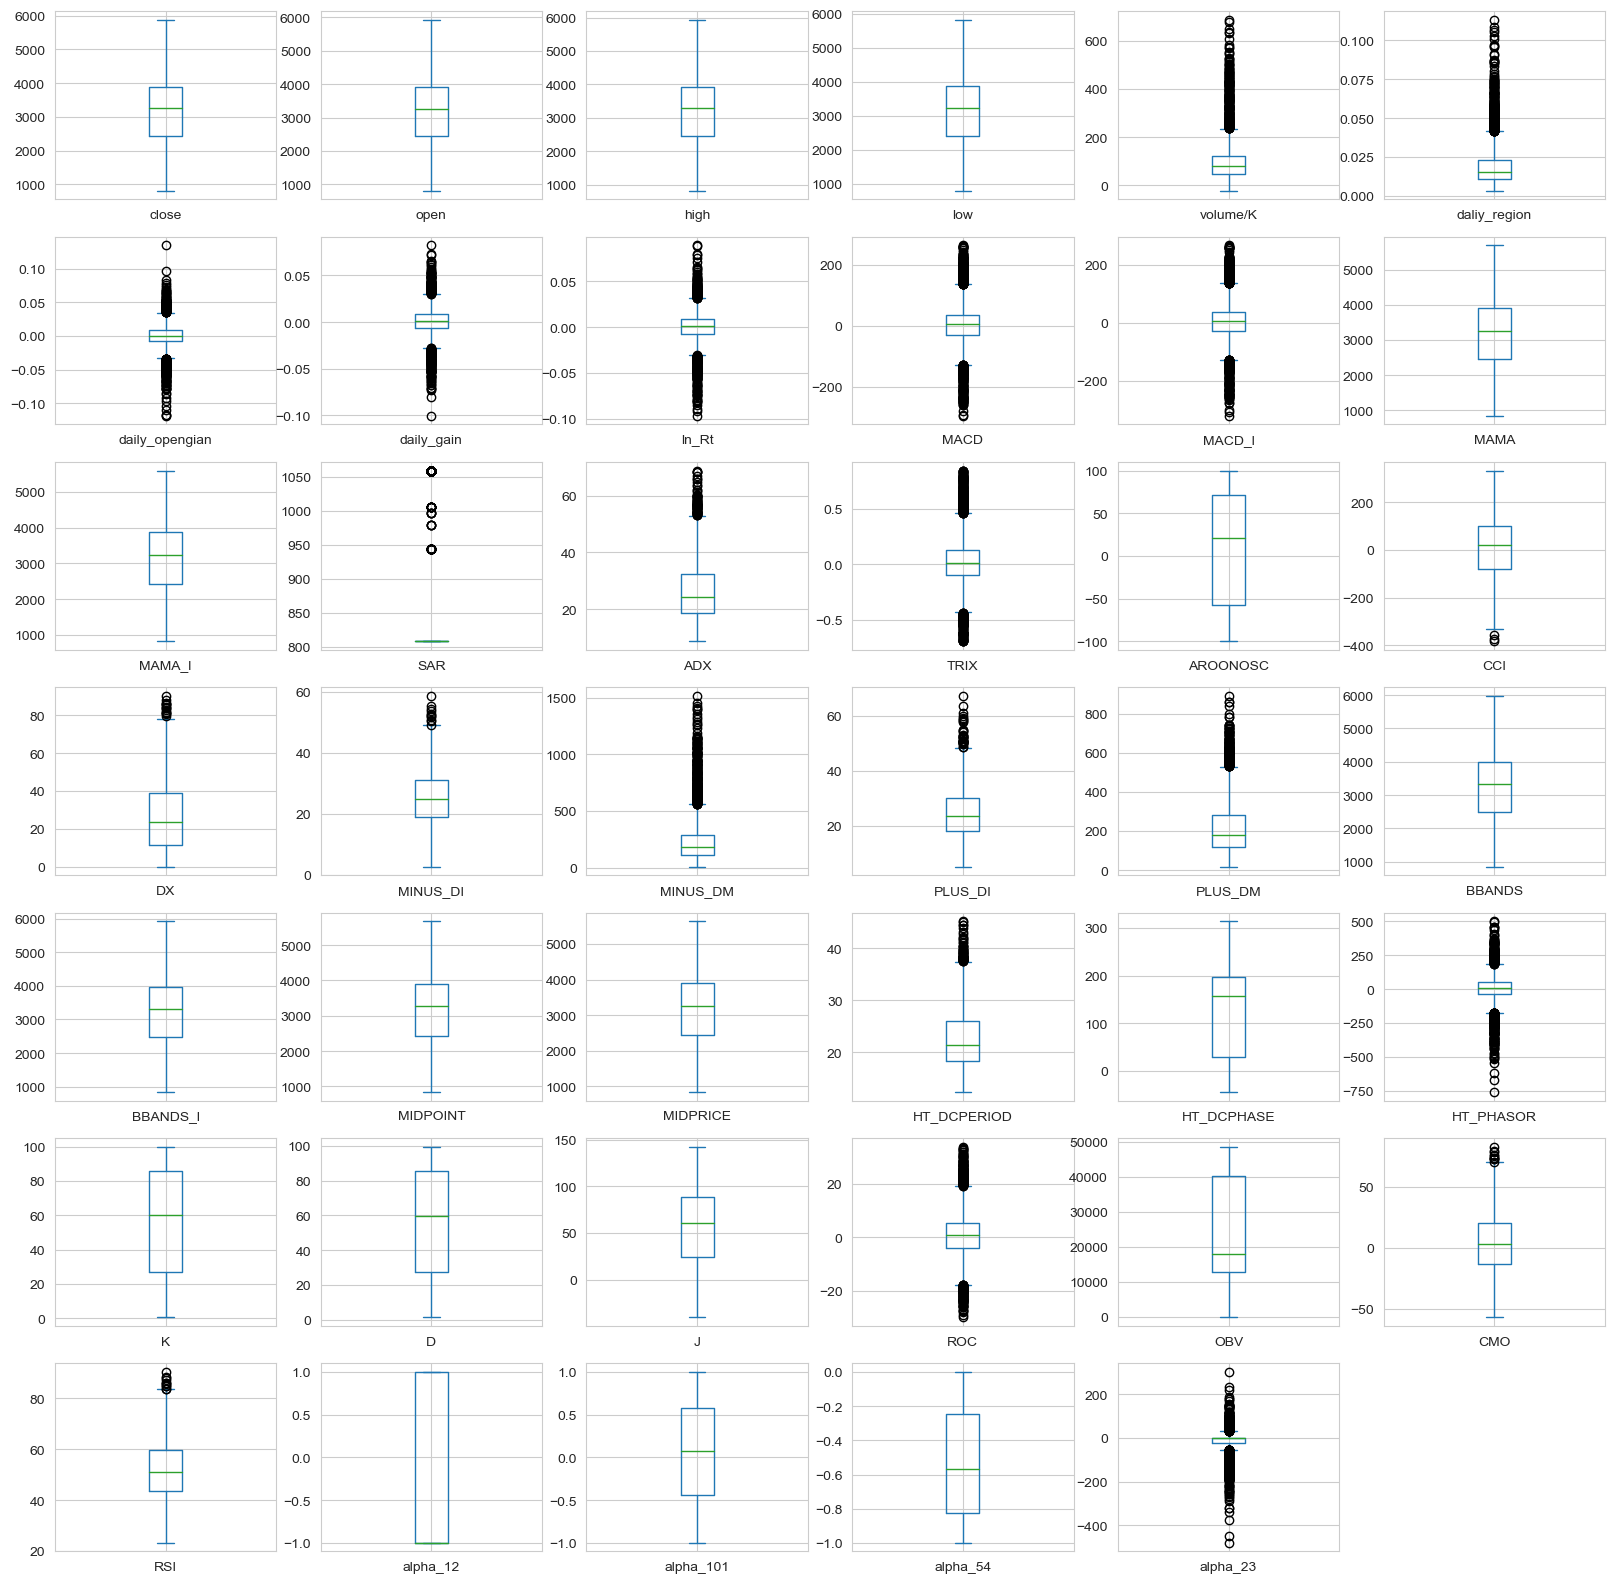

In [21]:
data.plot.box(subplots=True, layout=(7,6), figsize=(20,20))

<AxesSubplot: >

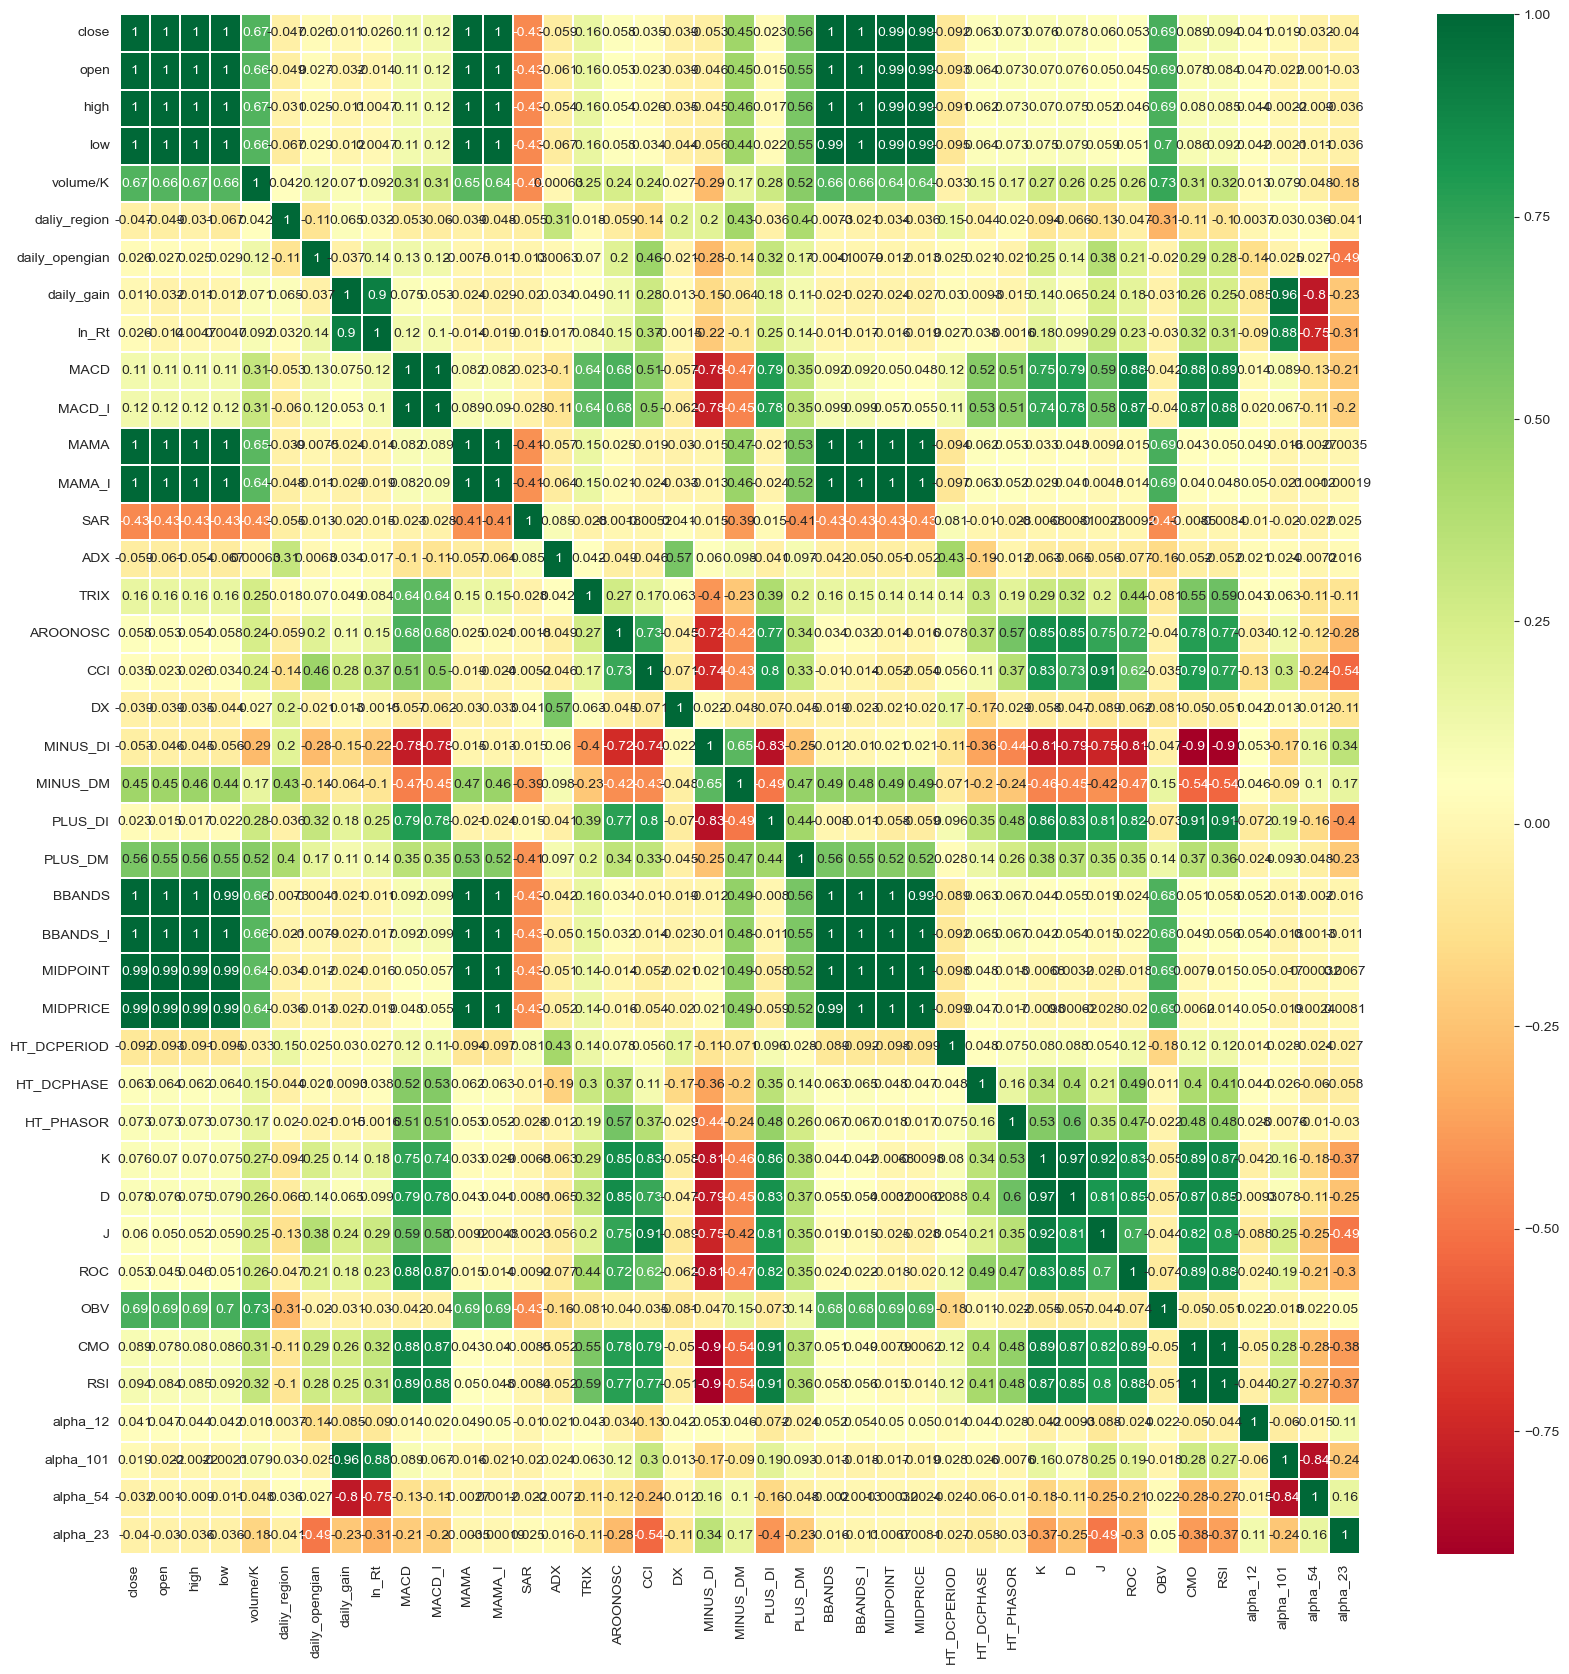

In [22]:
fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr('spearman'), annot=True, cmap='RdYlGn', linewidths=0.2, ax=ax)

In [23]:
data.dropna(inplace=True)

In [24]:
data.to_csv('../data/processed.csv')